# Neural solver for the 3D Poisson PDE

## Introduction

In this tutorial, we demonstrate the use of `rmldnn` as a **neural PDE solver**. 
The idea is to train a (deep) neural network to learn complex non-linear relationships between inputs and
outputs in a given domain, while minimizing a loss function that represents the residual of the PDE and
its boundary conditions. Once trained, these networks can then be used as fast surrogate models that provide
full-field solutions to PDEs at much lower costs compared to traditional numerical methods (e.g., finite elements).
We will demonstrate the use of `rmldnn` to solve the homogeuneous Poisson equation in 3D.


## The Poisson equation
The Poisson equation for the scalar field $u({\bf x})$ can be written as

$$
-\nabla \cdot (\nu({\bf x}) \nabla u({\bf x})) = f({\bf x}) \textrm{ in } D,
$$

where $\nu({\bf x})$ represents the *diffusivity* (or *permeability*) of the medium. Without loss of generality, we consider the homogeneous case where $f({\bf x}) = 0$, and impose the following boundary conditions assuming that $D$ is the unit cube:

\begin{cases}
 & u(0, y, z) = 1, \\
 & u(1, y, z) = 0, \\
 & \frac{\partial u}{\partial n} = 0 \textrm{ on other boundaries }
\end{cases}

The diffusivity map $\nu({\bf x})$ can be any function and, in the scheme of the neural solver, constitutes the input to the neural network. The output of the network will be the solution $u({\bf x})$ to the Poisson PDE.

## Neural network

For our surrogate model, we choose a fully convolutional neural network $G_{nn}$, which has the convenient property of being agnostic to the data size, 
since the filter weights for a convolution operation do not depend on the input resolution. In particular, we will use a standard 3D U-Net architecture:
 
<center>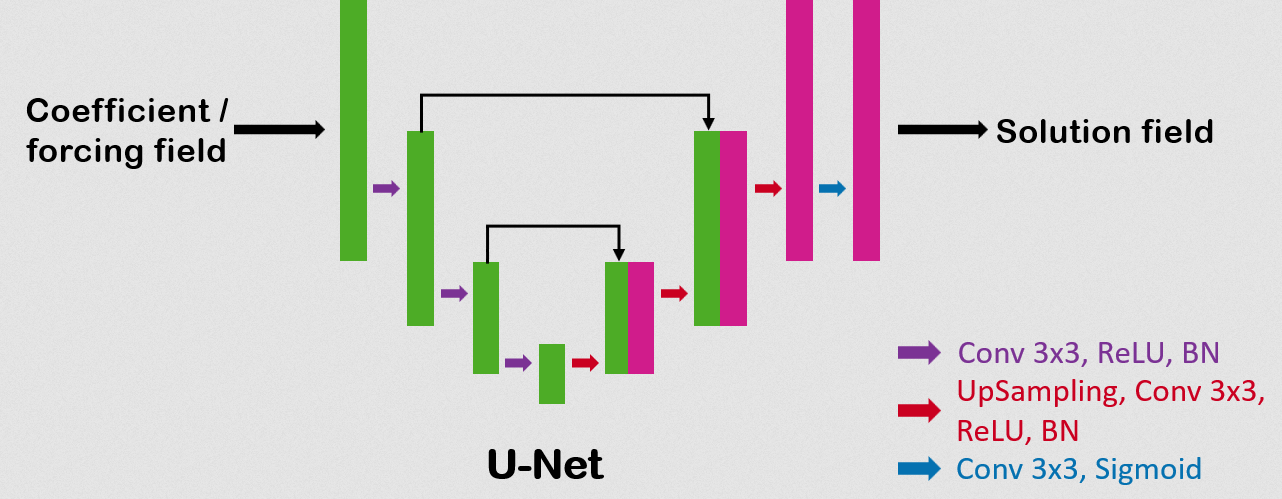</center>


A trained U-Net can take a full-field representing the material diffusivity (or forcing function) as input and map it to the full-field solution. In the schematic below,
we show a trained surrogate model $G_{nn}$ in 2D, which takes a matrix $S^d$ (numerical version of $\nu(x)$) as input and maps it to another 
matrix $U^d$ (approximate solution $u(x)$):

<center>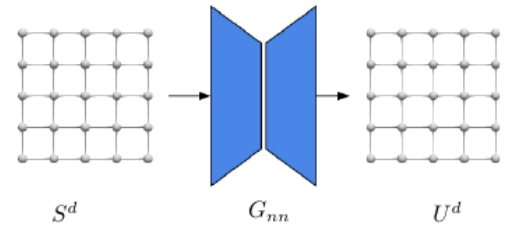</center>


## Loss function

We need to formulate a loss function that encapsulates the residual of the PDE and its boundary conditions. When the neural network is trained and this
function is minimized, we will have created a surrogate model capable of producing a full-field solution $u(x)$ that satisfies the PDE given a difusivity $\nu(x)$.

To that end, we formulate the loss function as the finite-element form of the PDE residual. By applying the standard Galerkin method, we end up with an
energy functional $L(x, \theta)$ that accounts for the PDE and its boundary conditions, and serves as our loss function:

$$
L(\theta) = {1 \over N_s} \sum_{j=1}^{N_s} \int \nu_j(x) |\nabla u_j(x, \theta)|^2 dx ,
$$

where $u_j = G_{nn}(\nu_j, \theta)$ is the desired PDE solution corresponding to the $j^{\rm th}$ sample of the diffusivity.

To be continued...